In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Root finding

In [17]:
x = np.linspace(0,4.2,100)

In [21]:
def func2a(x):
    """
    roots are at x = 1, 2 and 3
    """
    return x**3-6*x**2+11*x-6

def func2b(x):
    return np.tan()

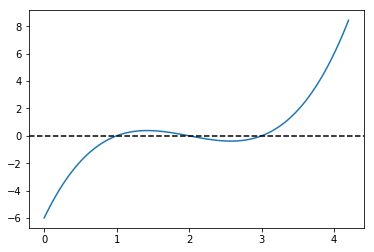

In [20]:
fig, ax = plt.subplots()
ax.plot(x,func2(x))
ax.axhline(y=0,xmin=0,xmax=1,ls='dashed',color='k')
plt.show()

In [122]:
def bisection_method(func, lower, upper, acc, MAX=50):
    
    ylower, yupper = func(lower), func(upper)

    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")

    for i in range(MAX):
        # split bracket in half
        mid = (upper+lower)/2
#         print (i, mid)
        ymid = func(mid)
        # check if in lower or upper bracket
        if ylower * ymid <= 0:
            # lower bracket
            upper = mid
        else: 
            # its in upper bracket
            lower = mid
            
        if abs(upper-lower) < acc:
            break
            
    return lower,upper, i+1 

In [123]:
def secant_method(func, lower, upper, acc, MAX=50):
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
        
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values
        x1 = x2
        x2 = x3
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1
        
        

In [124]:
def false_position(func, lower, upper, acc, MAX=100):
    """
    Same as secant, but recent points are the ones that
    bracket the root
    """
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
    
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values, most recent guess is two values that bracket
        if func(x3)*func(x2) <= 0: 
            # if new point has different sign, then update last point
            x1 = x2
        else:
            x1 = x1
        x2 = x3
        
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1

In [126]:
def brents_method(func, lower, upper, acc, MAX=100):
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower 
    x3 = x1
    for i in range(MAX):
        print ("TODO")
        
    
    

In [125]:
acc = 1e-5
xlower, xupper, itneeded = bisection_method(func2, 2.5,4.0,acc)
print ('===========')
print (f'Bisection method, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')

xlower, xupper, itneeded = secant_method(func2, 2.5,4.0,acc)
print ('===========')
print (f'Secant method, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')

xlower, xupper, itneeded = false_position(func2, 2.5,4.0,acc)
print ('===========')
print (f'False position, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')
# Note that the secant method finds another root, which is further away



Bisection method, x between 2.999998092651367,3.0000038146972656
Mean: 3.0000009536743164
Accuracy: 1e-05, Number of iterations needed: 18
Secant method, x between 3.000003738249954,2.9999999978820466
Mean: 3.0000018680660006
Accuracy: 1e-05, Number of iterations needed: 12
False position, x between 2.999999999999999,3.0
Mean: 2.9999999999999996
Accuracy: 1e-05, Number of iterations needed: 85


## Sorting

In [130]:
def selection_sort(arr):
    N = len(arr)
    # for every position in the array     
    for i in range(0,N-1):
        # Find next smallest element     
        imin = i
        for j in range(i+1, N):
            if arr[j] < arr[imin]:
                imin = j
        # put it in the correct position by swapping with current i
        if imin != i:
            arr[imin], arr[i] = arr[i], arr[imin]
    return arr

In [137]:
N = 20
print ("Timing of selection sort on array of length ",N)
%timeit (selection_sort(np.random.rand(N)))
print ("\nExample of sorted array with selection sort:")
print (selection_sort(np.random.rand(N)))

Timing of selection sort on array of length  20
51.7 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Example of sorted array with selection sort:
[0.09008106 0.13391863 0.1941305  0.21346141 0.23153668 0.28991625
 0.30757257 0.40748021 0.51738874 0.59300731 0.6232499  0.65930982
 0.70066682 0.78252324 0.86326815 0.87480361 0.89621404 0.93672383
 0.98091528 0.99848464]
